In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

Lets derive the vector form of the line seperating negative and positives first:

$$ y = mx + b $$

$$ m = \frac{y_b - y_a}{x_b - x_a} $$

$$ y = x(\frac{y_b - y_a}{x_b - x_a}) + b $$

$$ (y - b)(x_b - x_a) = x(y_b - y_a) $$

$$ y(x_b - x_a) - b(x_b - x_a) = x(y_b - y_a) $$

$$ 0 = b(x_b - x_a) + x(y_b - y_a) - y(x_b - x_a) $$

$$ 0 = b(x_b - x_a) + x(y_b - y_a) + y(x_a - x_b) $$

$$ 0 = A + Bx + Cy $$

$$ 0 = \begin{bmatrix} A \\ B \\ C \end{bmatrix} \cdot \begin{bmatrix} 1 & x & y \end{bmatrix} $$

$$ b = y - x(\frac{y_b - y_a}{x_b - x_a}) $$

$$ b = y_a - x_a(\frac{y_b - y_a}{x_b - x_a}) $$

$$ b = y_a(\frac{x_b - x_a}{x_b - x_a}) - x_a(\frac{y_b - y_a}{x_b - x_a}) $$

$$ b = \frac{y_ax_b - y_ax_a - y_bx_a + y_ax_a}{x_b - x_a} $$

$$ b = \frac{y_ax_b - y_bx_a}{x_b - x_a} $$

$$ A = b(x_b - x_a) $$

$$ A = y_ax_b - x_ay_b$$

$$ 0 = \begin{bmatrix} y_ax_b - x_ay_b \\ y_b - y_a \\ x_a - x_b \end{bmatrix} \cdot \begin{bmatrix} 1 & x & y \end{bmatrix} $$

We can now just randomize two points to initiate a seperation plane, and take the dot product with some point [1 x y] vector to determine the sign of the point relative to the plane.

Note that:

$$ -1(x_a - x_b) = x_b - x_a $$

Thus:

$$ b = \frac{y_ax_b - y_bx_a}{-1(x_a - x_b)} $$

$$ m = \frac{y_b - y_a}{-1(x_a - x_b)} $$

This will be useful later.

In [2]:
def get_slope_intercept(v):
    slope = v[1]/(-1*v[2])
    intercept = v[0]/(-1*v[2])
    return slope, intercept

def create_seperation_vector():
    xA, yA, xB, yB = [random.uniform(-1, 1) for i in xrange(4)]
    v = np.array([xB*yA - xA*yB, yB - yA, xA - xB])
    return v

def generate_x(n):
    X = np.zeros((n, 3))
    for i in xrange(n):
        x, y = [random.uniform(-1, 1) for j in xrange(2)]
        X[i] = np.array([1, x, y])
    return X

def create_labels(v, X):
    func = lambda x: np.sign(v.dot(x))
    return np.apply_along_axis(func, 1, X)

def plot_X_with_label(X, y, show=False):
    X_pos = X[y > 0]
    X_neg = X[y < 0]
    plt.scatter(X_pos[:, 1], X_pos[:, 2], color='r')
    plt.scatter(X_neg[:, 1], X_neg[:, 2], color='b')
    
    if show:
        plt.show()
        
def plot_seperation_plane(m, b, linestyle='-', color='g'):
    x = np.linspace(-1, 1)
    plt.plot(x, m*x + b, linestyle=linestyle, color=color)

In [3]:
v = create_seperation_vector()

In [4]:
m, b = get_slope_intercept(v)

In [5]:
D = generate_x(20)

In [6]:
labels = create_labels(v, D)

As we can see below, we now have some hyperplane with some linearly seperable points.  We can now play with linear perceptrons.

/Users/minghuang/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


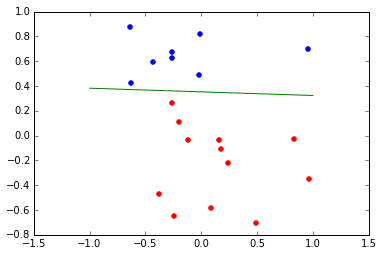

In [7]:
plot_X_with_label(D, labels)
plot_seperation_plane(m, b)

The Linear Perceptron finds the seperation plane through the hypothesis:

$$ h(x) = sign(w^{t}x) $$

for some data:

$$ X_n = x_1, x_2, ... x_n \textrm{ where each x is a vector of some dimension} $$

and some label of -1 and 1 for each x.

w is some weight vector that we will initialize which takes the inner product with each vector x, and we hope to achieve the following conditions.

$$ \textrm{If } \sum{w_i}{x_i} > \textrm{ some threshold then declare +1} $$

$$ \textrm{If } \sum{w_i}{x_i} < \textrm{ some threshold then declare -1} $$

Thus, we only care about the sign of the dot product.

The hypothesis updates by checking if for any x, y:

$$ sign(w^{t}x) \neq y $$ 

If so, we update w by:

$$ w = w + y_ix_i $$

In [8]:
class LinearPerceptron(object):
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self._initialize_weights()
        
    def _initialize_weights(self):
        self.w = np.zeros(self.X.shape[1])
    
    def _update_weights(self):
        for i, x in enumerate(self.X):
            if np.sign(self.w.dot(x)) != self.y[i]:
                self.w += self.y[i]*x
                break

    def learn(self):
        current_w = np.ones(self.w.shape[0])
        n_iter = 0
        #return self.W, current_W
        while (self.w != current_w).all() or n_iter == 0:
            current_w = self.w.copy()
            self._update_weights()
            if (self.w != current_w).all():
                n_iter += 1
        #print 'LPA learned in %d iterations' % n_iter
        return n_iter
    
    def predict(self, X):
        return np.sign(X.dot(self.w))

In [9]:
lpa = LinearPerceptron(D, labels)

In [10]:
lpa.learn()

11

In [11]:
def LPA_wrapper(n=10):
    v = create_seperation_vector()
    X = generate_x(n)
    m, b = get_slope_intercept(v)
    labels = create_labels(v, X)
    lpa = LinearPerceptron(X, labels)
    n_iter = lpa.learn()
    m_w, b_w = get_slope_intercept(lpa.w)
    plot_X_with_label(X, labels)
    plot_seperation_plane(m, b)
    plot_seperation_plane(m_w, b_w, linestyle='--')
    plt.show()

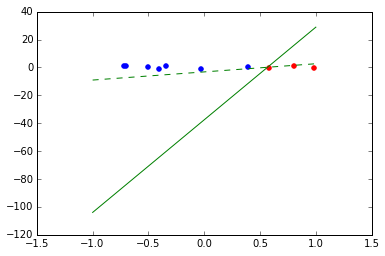

In [38]:
LPA_wrapper()

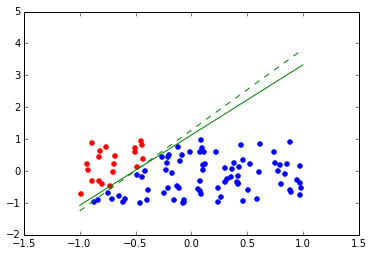

In [24]:
LPA_wrapper(100)

In [14]:
def LPA_avg_iter(n=10, k=10000):
    n_iters = []
    for i in xrange(k):
        v = create_seperation_vector()
        X = generate_x(n)
        m, b = get_slope_intercept(v)
        labels = create_labels(v, X)
        lpa = LinearPerceptron(X, labels)
        n_iter = lpa.learn()
        n_iters.append(n_iter)
    return np.mean(n_iters)

In [15]:
LPA_avg_iter()

11.249000000000001

In [41]:
LPA_avg_iter(100)

208.059

In [17]:
def LPA_test_score(train_n=10, test_n=100000):
    v = create_seperation_vector()
    train_X = generate_x(train_n)
    test_X = generate_x(test_n)
    m, b = get_slope_intercept(v)
    train_labels = create_labels(v, train_X)
    test_labels = create_labels(v, test_X)
    lpa = LinearPerceptron(train_X, train_labels)
    n_iter = lpa.learn()
    test_pred = lpa.predict(test_X)
    corrects = sum(test_labels == test_pred)
    return 1. * (test_n - corrects) / test_n

In [21]:
LPA_test_score()

0.12752

In [22]:
LPA_test_score(train_n=100)

0.01573